In [30]:
# Install d2l
!pip install d2l==0.17.2

In [31]:
# Import library
%matplotlib inline
import random
import tensorflow as tf
from d2l import torch as d2l

In [32]:
# Generating the dataset
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [33]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-1.5004765   0.04720526], shape=(2,), dtype=float32) 
label: tf.Tensor([1.0313745], shape=(1,), dtype=float32)


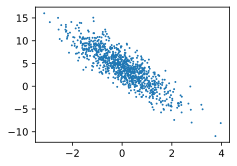

In [34]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [35]:
# Reading the dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [36]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.55087775  0.38811323]
 [ 0.31735492 -0.27762574]
 [ 1.3879104   0.69803953]
 [ 0.00507281  0.07369531]
 [ 1.2193773  -0.0458543 ]
 [ 1.7638361  -1.1531371 ]
 [ 0.1470569  -0.95969254]
 [-0.79390997 -0.6171812 ]
 [ 0.0734024   0.6536803 ]
 [ 0.9898596   1.0014278 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 1.7729567]
 [ 5.7987285]
 [ 4.6056004]
 [ 3.9515731]
 [ 6.797634 ]
 [11.650957 ]
 [ 7.7599316]
 [ 4.707423 ]
 [ 2.1374197]
 [ 2.7792542]], shape=(10, 1), dtype=float32)


In [37]:
# initializing model parameters
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [38]:
# Defining the model
def linreg(X, w, b):
    """The linear regression model."""
    return tf.matmul(X, w) + b

In [39]:
# Defining the loss function
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [40]:
# Defining the optimization algorithm
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [41]:
# Training
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.034870
epoch 2, loss 0.000124
epoch 3, loss 0.000048


In [42]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00044405 -0.00026536]
error in estimating b: [0.00046873]
